Web Scraping fact-checker website [PolitiFact](https://www.politifact.com/) using BeautifulSoup library for true news.

Author - Anshu Kushwah

# Importing Dependencies

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests 
import urllib.request
import time

In [2]:
headlines = [] # Stored title of the news 
targets = [] # True/False
for pagenumber in range(1,101): # Web Scraping first 100 pages
  pagenumber = str(pagenumber)
  URL = "https://www.politifact.com/factchecks/list/?page="+pagenumber+"&ruling=true"
  webpage = requests.get(URL)
  soup = BeautifulSoup(webpage.text, "html.parser")
  # Fetching title/headline of news
  text = soup.find_all('div',attrs={'class':'m-statement__quote'})
  for i in text:
    link1 = i.find_all('a')
    headline = link1[0].text.strip()
    headlines.append(headline)

  #  Fetching the target which is weather news is true/false
  target = soup.find_all('div',attrs={'class':'m-statement__meter'})
  for j in target:
    link2 = j.find('div',attrs={'class':'c-image'}).find('img').get('alt')
    targets.append(link2)

In [3]:
final_headline = []
final_targets = []
for i in range(len(headlines)):
  if(targets[i] == "pants-fire"):
    final_targets.append("false")
    final_headline.append(headlines[i])
  if(targets[i]=="false" or targets[i]=="true"):
    final_targets.append(targets[i])
    final_headline.append(headlines[i])

In [4]:
len(final_headline)

2466

# Making DataFrame

In [5]:
data = {'Headline':final_headline,
        'Target':final_targets}
df = pd.DataFrame(data)
df.head()

,Headline,Target
0,Says Republican U.S. Sen. Ron Johnson “called ...,true
1,"""In the Wisconsin State Assembly this session,...",true
2,Texas' public high school graduation rate is a...,true
3,“The four big meat packers are raking in recor...,true
4,"“In Virginia, Black people are eight times (8X...",true


In [6]:
# Saving csv file
df.to_csv("/content/PolitiFact02.csv")

# Initial Analysis

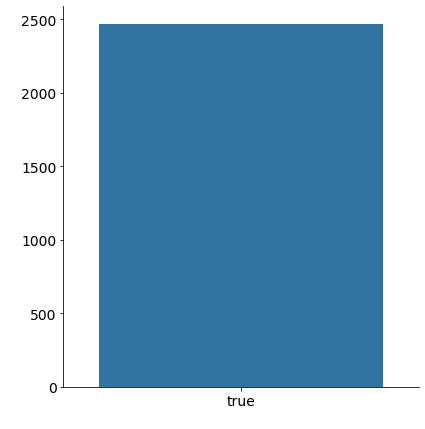

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,7))
# barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=df["Target"])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)